<h1>FINAL ACTIVITIES</h1>
<h2>Analyst: Coedy P. de la Cruz</h2>

# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [2]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

<h1>Answer Below:</h1>

In [3]:
# Your EDA code here
print('1.) How many unique job titles are there?\n')

unique_jobs = df['job_title'].nunique()
print("The Number of Unique Job Titles:", unique_jobs)


1.) How many unique job titles are there?

The Number of Unique Job Titles: 93


In [4]:
print('2.) Average salary per work_year:\n')

avg_salary_year = df.groupby('work_year')['salary_in_usd'].mean().reset_index()
print(avg_salary_year)


2.) Average salary per work_year:

   work_year  salary_in_usd
0       2020   92302.631579
1       2021   94087.208696
2       2022  133379.510804
3       2023  148954.558413


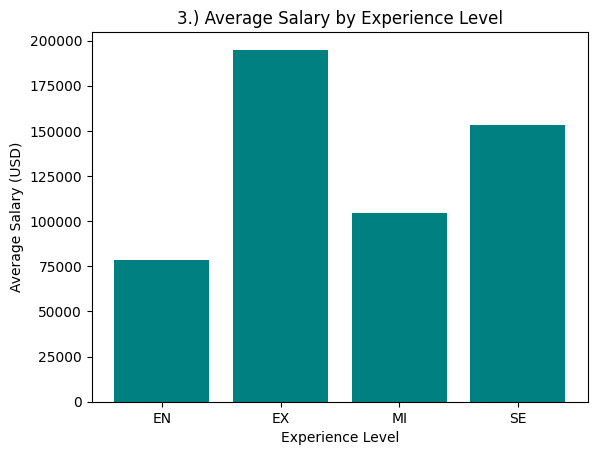

In [5]:
avg_salary_exp = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

plt.bar(avg_salary_exp['experience_level'], avg_salary_exp['salary_in_usd'], color='teal')
plt.title("3.) Average Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.show()


## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

In [6]:
le_exp = LabelEncoder()
df['experience_level_encoded'] = le_exp.fit_transform(df['experience_level'])

le_job = LabelEncoder()
df['job_title_encoded'] = le_job.fit_transform(df['job_title'])

features = ['job_title_encoded', 'work_year', 'experience_level_encoded']
X = df[features]
y = df['salary_in_usd']

# Show first few rows
X.head()

,job_title_encoded,work_year,experience_level_encoded
0,8,2023,0
1,8,2023,0
2,41,2023,0
3,22,2023,0
4,8,2023,0


## 📈 Part 4: Train a Linear Regression Model

In [7]:
# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.17
RMSE: 58477.29


## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [8]:
avg_job_title = int(df['job_title_encoded'].median())

future_data = pd.DataFrame({
    'job_title_encoded': [avg_job_title] * 4,
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3] 
})

future_data = future_data[['job_title_encoded', 'work_year', 'experience_level_encoded']]
predicted_salaries = model.predict(future_data)

results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})
results

,Experience Level,Predicted 2024 Salary (USD)
0,Entry,110718.606564
1,Mid,130632.668408
2,Senior,150546.730252
3,Executive,170460.792096


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
2. What are the limitations of using only `work_year` and `experience_level`?
3. How could you improve this model? (Think: more features, better encoding, etc.)
4. Why is **R² not enough** to trust your predictions?

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

<h2>1.) Does your model make reasonable predictions? Why or why not?</h2>

I think my model gives results that make sense overall because the predicted salaries increase as the experience level goes up which is what we’d expect in real life. But I also noticed that some values don’t fully reflect realistic salary gaps so it’s not perfect.

<h2>2.) What are the limitations of using only work_year and experience_level?</h2>

This features do not actually reflect the complete picture. Among other things salaries are determined by the job title, company size, the respective country, and the industry as well. Since my model only uses a few columns it’s missing a lot of that context.

<h2>3.) How could you improve this model?</h2>

I could add more features such as job title, company size, and employment type. I could also try using better encoding methods or other models that can handle non-linear data. That might help capture more realistic salary trends.

<h2>4.) Why is R² not enough to trust your predictions?</h2>

R² only shows how well the model fits the data, but it doesn’t always mean the predictions are accurate. A model can have a high R² and still make big errors when predicting new values. That’s why I can’t rely on it alone it’s better to also look at other metrics and test the model on unseen data.

## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀